<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

In [2]:
# Student names and numbers:
# Rokas Barasa - 285047

The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

In [3]:
# Import all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Exercise 1: Regression

For this exercise we will be using the famous nycflights13 data which contains the `airlines`, `airports`, `flights`, `planes`, and `weather` datasets. Please see the documentation (`nycflights13.pdf`) for further information.

**a)** Load all files as pandas dataframes and display the first 5 rows of each dataset.

In [4]:
flights = pd.read_csv('flights.csv')
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
planes = pd.read_csv('planes.csv')
weather = pd.read_csv('weather.csv')

display("flights")
display(flights[0:5])
display("airlines")
display(airlines[0:5])
display("airports")
display(airports[0:5])
display("planes")
display(planes[0:5])
display("weather")
display(weather[0:5])

'flights'

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


'airlines'

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


'airports'

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5.0,A,America/New_York


'planes'

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


'weather'

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


**b)** Convert all temperature attributes to degree Celsius. We will be using this in what follows.

In [5]:
weather["temp"] = (weather["temp"] - 32) * 5/9
weather["dewp"] = (weather["dewp"] - 32) * 5/9

# display(weather[0:5])

**c)** Using OLS, investigate if flight distance is associated with arrival delay. You should be cautious regarding negative delays.

In [6]:
flightdata = flights.copy(deep=True)
flightdata["arr_delay"] = flightdata["arr_delay"] - flights["dep_delay"] 
flightdata = flightdata.dropna()

X = flightdata.loc[:,["distance"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.009232222182055438 
Test data: 0.008692811927246136


**d)** Using OLS, investigate if departure delay is associated with arrival delay. Again,
   consider what to do with negative delays.

In [7]:
flightdata = flights.copy(deep=True)
flightdata = flightdata.dropna()

X = flightdata.loc[:,["dep_delay"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.7971250867807199 
Test data: 0.7826321891385306


**e)** Is the age of the plane associated with delay? Do OLS, Ridge and Lasso.

OLS

In [8]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS dep and plane age\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS dep and plane age
Train data: 0.0005278293484642926 
Test data: 0.0005051231206146811


In [9]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata["arr_delay"] = flightdata["arr_delay"] - flights["dep_delay"] 
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["arr_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS arr and plane age\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS arr and plane age
Train data: 0.00015125425051476515 
Test data: 0.0003398893899592137


RESULT - plane age and delay time is unrelated


In [10]:
flightdata = pd.merge(flights.copy(deep=True), planes.copy(deep=True), on="tailnum")

flightdata = flightdata.loc[:,["year_x", "year_y", "dep_delay", "arr_delay"]]
flightdata["plane_age"] = flightdata["year_x"] - flightdata["year_y"]
flightdata = flightdata.dropna()

X = flightdata.loc[:,["plane_age"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:

alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

Ridge
Train data: 0.0005276424313449546 
Test data: 0.0005049010808814147


In [12]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))

Lasso
Train data: 0.0005278288206347348 
Test data: 0.0005051203487510536


**f)** Investigate whether departure delay is associated with weather conditions at the origin airport. This includes merging datasets in an appropriate way, considering missing values, regression modelling and plotting. For regression, do Ridge or Lasso.
   
The analysis should also include seasonality trends as a "weather condition". You could, for instance, plot the daily departure delay with the date (or month). 

What are the three most important weather conditions when trying to predict departure delays (you can e.g. use the function "select_percentile")?

Weather relation to departure delays
Train data: 0.02007672221744028 
Test data: 0.021648039246437656


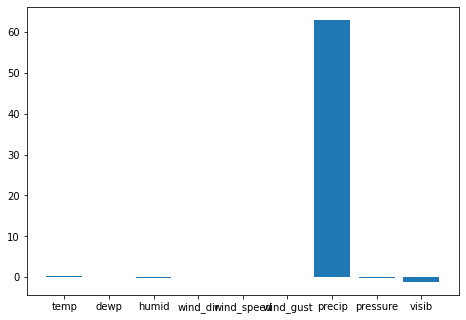

In [13]:
flightdata = pd.merge(flights.copy(deep=True), weather.copy(deep=True), on=["origin", "year", "month", "day", "hour"])

flightdata = flightdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib" ,"dep_delay", "arr_delay"]]

flightdata = flightdata.dropna()

X = flightdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "wind_gust", "precip", "pressure", "visib"]]
y = flightdata.loc[:,["dep_delay"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Weather relation to departure delays\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))

# Show graph of most important parameters
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
col = X.columns
score = lassocv.coef_
ax.bar(col,score)
plt.show()


In [14]:
#Seasonality analysis
#Get amount of delays for each month and total flights for each month
flightdata = pd.merge(flights.copy(deep=True), weather.copy(deep=True), on=["origin", "year", "month", "day", "hour"])
flightdata["dep_delay"] = flightdata["dep_delay"].apply(lambda value: 1 if value > 0 else 0)
flightdata = flightdata.dropna()

monthsNames = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October","November", "December"]
monthsAmountDelayed = []
monthsAmountTotal = []
monthsAmountPercent = []


for x in range(0,12):
  monthsAmountDelayed.append(0)
  monthsAmountTotal.append(0)
  monthsAmountPercent.append(0)

for index, row in flightdata.iterrows():

  if row["dep_delay"] == 1:
    monthsAmountDelayed[row["month"] - 1] = monthsAmountDelayed[row["month"] - 1] + 1

  monthsAmountTotal[row["month"] - 1] = monthsAmountTotal[row["month"] - 1] + 1


for i, data in enumerate(monthsAmountPercent):
  monthsAmountPercent[i] = monthsAmountDelayed[i] /  monthsAmountTotal[i] * 100

Seasonal analysis of flight delays
Blue - total flights
Orange - delayed flights


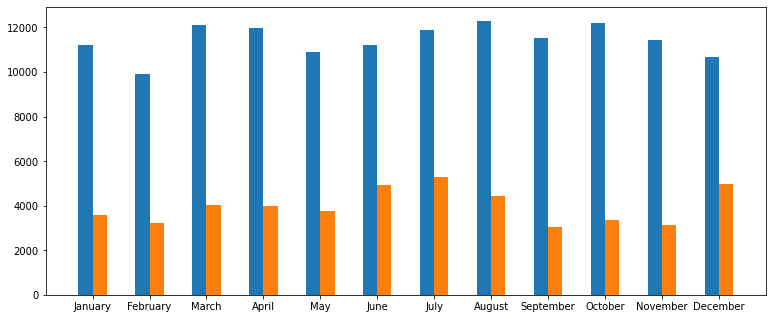

In [15]:

print("Seasonal analysis of flight delays\nBlue - total flights\nOrange - delayed flights")
x = np.arange(len(monthsNames)) 
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_axes([0,0,1,1])
col = monthsNames
width = 0.25
ax.bar(x - width/2, monthsAmountTotal, width, label='Total')
ax.bar(x + width/2, monthsAmountDelayed, width, label='Delayed')
ax.set_xticks(x)
ax.set_xticklabels(col)
plt.show()


Seasonal analysis of flight delays
Shown percentage of flights missed from total that month 


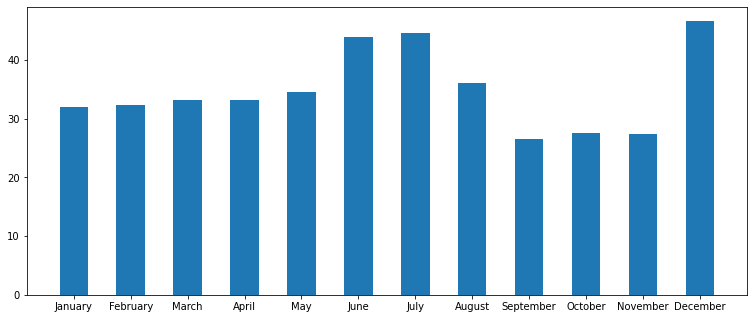

In [16]:
print("Seasonal analysis of flight delays\nShown percentage of flights missed from total that month ")
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_axes([0,0,1,1])
col = monthsNames
width = 0.50
ax.bar(x, monthsAmountPercent, width, label='Total')
ax.set_xticks(x)
ax.set_xticklabels(col)
plt.show()


The data shows some results but its not enough to make conclusions

**g)** Do a principal component analysis of the weather at JFK using the following columns:
   temp, dewp, humid, wind_dir, wind_speed, precip, visib.
   How many principal components should be used to capture all the variability in the weather data?

In [17]:
weatherdata = weather.copy(deep=True)
weatherdata = weatherdata.loc[weatherdata["origin"] == "JFK"]
weatherdata = weatherdata.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib"]]
weatherdata = weatherdata.dropna()
weatherdata.loc[:,"temp":"visib"] = StandardScaler().fit_transform(weatherdata.loc[:,"temp":"visib"])

pca = PCA(n_components=None)
pca.fit(weatherdata)

transformed_data = pca.transform(weatherdata)

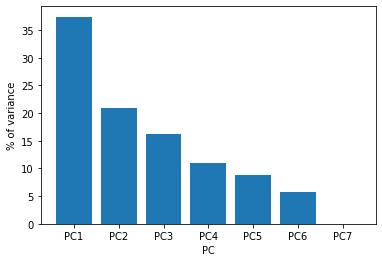

In [18]:

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #labels for the plot

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of variance')
plt.xlabel("PC")

plt.show()

RESULT: PC1-PC6 should be used to have all vairiance in the data.

**h)** Build regression models (OLS, Ridge and Lasso) that associates
   an airports lattitude with weather conditions (temp, dewp, humid, wind_dir, wind_speed,
   precip, visib). Remove all but the three most significant wheather conditions and redo
   the analysis.

In [19]:
airportWeather = pd.merge(weather.copy(deep=True), airports.copy(deep=True), left_on='origin', right_on='faa')
airportWeather = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib", "lat"]]
airportWeather = airportWeather.dropna()

X = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib"]]
y = airportWeather.loc[:,["lat"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)


In [20]:

ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

Train data: 0.03285428224520015 
Test data: 0.031942924819366114


In [21]:
alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

Train data: 0.032839404333787736 
Test data: 0.03214078064340964


In [22]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))


Train data: 0.03281117081766538 
Test data: 0.032245002696982494


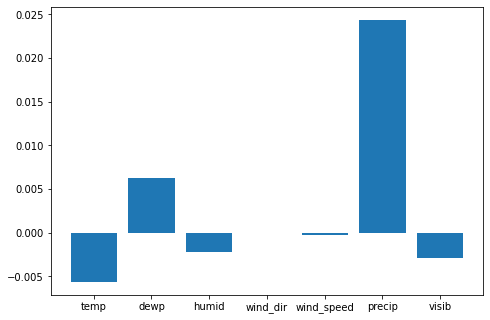

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
col = X.columns
score = lassocv.coef_
ax.bar(col,score)
plt.show()

Need to only leave "percip", "temp", "dewp"

In [24]:
airportWeather = pd.merge(weather.copy(deep=True), airports.copy(deep=True), left_on='origin', right_on='faa')
airportWeather = airportWeather.loc[:,["temp", "dewp", "humid", "wind_dir", "wind_speed", "precip", "visib", "lat"]]
airportWeather = airportWeather.dropna()

X = airportWeather.loc[:,["temp", "dewp", "precip"]]
y = airportWeather.loc[:,["lat"]]

X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)


In [28]:
ODS = LinearRegression()
ODS.fit(X_train, y_train)

print("OLS\nTrain data: {} \nTest data: {}".format(ODS.score(X_train, y_train), ODS.score(X_test, y_test)))

OLS
Train data: 0.013730108806868535 
Test data: 0.017879223286407675


In [30]:
alphas = 10**np.linspace(-10, 10, 100)
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)

print("Ridge\nTrain data: {} \nTest data: {}".format(ridgecv.score(X_train, y_train), ridgecv.score(X_test,y_test)))

Ridge
Train data: 0.013729820227529443 
Test data: 0.017860948166446344


In [29]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print("Lasso\nTrain data: {} \nTest data: {}".format(lassocv.score(X_train, y_train), lassocv.score(X_test,y_test)))


Lasso
Train data: 0.013730072482028288 
Test data: 0.017872935148575353


 **i)** These questions require no code.
 - Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter or reduce it?

- Why would you want to use:
        > Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
        > Lasso instead of Ridge Regression?

1. I would say that it suffers from high bias because it did not fit to the data. It also has very high variance because it does not fit the test data either.
Based on that the model has high bias and a bigger regularization produces more bias, I would reduce the regularization.

2. I assume this is not related to first question
If ridge regression is used without any regularization (aplpha=0) it the same as OLS, has the same bias as OLS. In that case it is better to choose normal OLS regression.
Ridge regression is useful because for a slight increase in bias it has a significant decrese in variance. A slighly worse fit results in better overal predictions.
Lasso regression removes useless variables and makes the information relation easier to interpret. Ridge regression uses all variables regardless if they are important or not.


# Exercise 2: PCA

This exercise will depart from the equally famous mnist dataset, which is loaded from the file "mnist-original" below.

In [25]:
from scipy.io import loadmat
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
import numpy as np
print("Number of datapoints: {}\n".format(mnist_data.shape[0]))
print("Number of features: {}\n".format(mnist_data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist_label)))

Number of datapoints: 70000

Number of features: 784

List of labels: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]



There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function:

Value of datapoint no. 4:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  37
 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253
 253 253 116   0   0   0   0   0   0   0   0   0   0   0   0   0  16 160
 236 253 253 253 254 253 

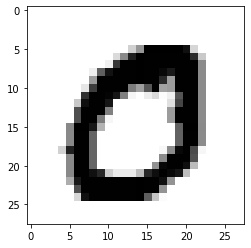

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist_data[index]))
print("As image:\n")
plt.imshow(mnist_data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

**a)** Split the MNIST dataset into a training set and a test set. Use 60,000 instances for training and 10,000 for test.

**b)** Train a Random Forest classifier on the dataset and time how long it takes.
   Then evaluate the resulting model on the test set (disregarding "don't use test set")

**c)** Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

**d)** Train a new Random Forest classifier on the reduced dataset and see how long it takes.
   Was training much faster? Next evaluate the classifier on the test set: how does it
   compare to the previous classifier?

**e)** Using at least two other classifiers from the curriculum, train a model on the reduced dataset. For each model, you must tune at least two hyperparameters.

**f)** Use PCA to reduce the MNIST dataset down to two dimensions and plot the result using
   Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s
   target class. Alternatively, you can write colored digits at the location of each instance. You can see examples in the course book pp. 165-166.
   
   Which digits do you think would be easiest to distinguish using only two principal components? Which would be hard?

**g)** These questions require no code.
 - What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?

 - Once a dataset’s dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

# Exercise 3: Cluster Analysis

For this exercise we return to the MNIST data, and we are exploring several clustering techniques with it.

**a)** Perform k-means clustering with k=10 on this dataset.

**b)** Plot the images corresponding to the cluster centers. Do the clusters (roughly) coincide with the 10 different actual digits? Investigate which clusters a few different digits from the dataset are assigned to. 

**c)** Perform a supervised clustering evaluation using adjusted rand index (described on page 191-193 of the book).
   Are the results stable when you perform several random restarts of k-means?
   Note: you can speed up fitting by using MiniBatchKMeans instead of "regular" KMeans.

**d)** Now perform hierarchical clustering on the data.
   (in order to improve visibility in the constructed dendrograms, you can use a
   much reduced dataset as constructed using sklearn.utils.resample shown below).
   Does the visual analysis of the dendrogram indicate a natural number of clusters?

In [27]:
from sklearn.utils import resample
small_mnist_data,small_mnist_label = resample(mnist.data,mnist.target,n_samples=200,replace='false')

AttributeError: 'dict' object has no attribute 'data'

**e)** Using different cluster distance metrics (ward,single,average, etc.),
   what do the clusterings look like that are produced at the level of k=10 clusters?

**f)** Do a DBSCAN clustering of the small dataset. Tweak the different parameters.

**g)** Try to compare the different clustering methods on the MNIST dataset in the same way
   the book does on the faces dataset on pp. 195-206.